## Importación de módulos y carga dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('winequality.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Identificar valores nan

In [3]:
for column in df.columns:
    nan_values = df[column].isna().sum()
    print(f"Columna '{column}': {nan_values} valores NaN")

Columna 'type': 0 valores NaN
Columna 'fixed acidity': 10 valores NaN
Columna 'volatile acidity': 8 valores NaN
Columna 'citric acid': 3 valores NaN
Columna 'residual sugar': 2 valores NaN
Columna 'chlorides': 2 valores NaN
Columna 'free sulfur dioxide': 0 valores NaN
Columna 'total sulfur dioxide': 0 valores NaN
Columna 'density': 0 valores NaN
Columna 'pH': 9 valores NaN
Columna 'sulphates': 4 valores NaN
Columna 'alcohol': 0 valores NaN
Columna 'quality': 0 valores NaN


### Sustituyo los nan por la media en su correspondiente columna y la columna type la convierto en 0 y 1

In [4]:
# Creamos las variables dummy
df_dummies = pd.get_dummies(df['type'])

# Ahora unimos las variables dummy al DataFrame original
df = pd.concat([df, df_dummies], axis=1)

# Opcionalmente, puedes eliminar la columna original 'type' si ya no la necesitas
df.drop('type', axis=1, inplace=True)

In [5]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,1,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1,0


In [8]:
for column in df.columns:
    if column != 'type':
        column_mean = df[column].mean()
        df[column].fillna(column_mean, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red                   6497 non-null   uint8  
 13  white                 6497 non-null   uint8  
dtypes: float64(11), int64(1), uint8(2)
memory usage: 621.9 KB


In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378,0.246114,0.753886
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255,0.430779,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


### Guardo dataframe resultante

In [11]:
df_limpio = "wine_limpio.csv"
df.to_csv(df_limpio, index=False)

## Estudio univariante y análisis correlación entre variables

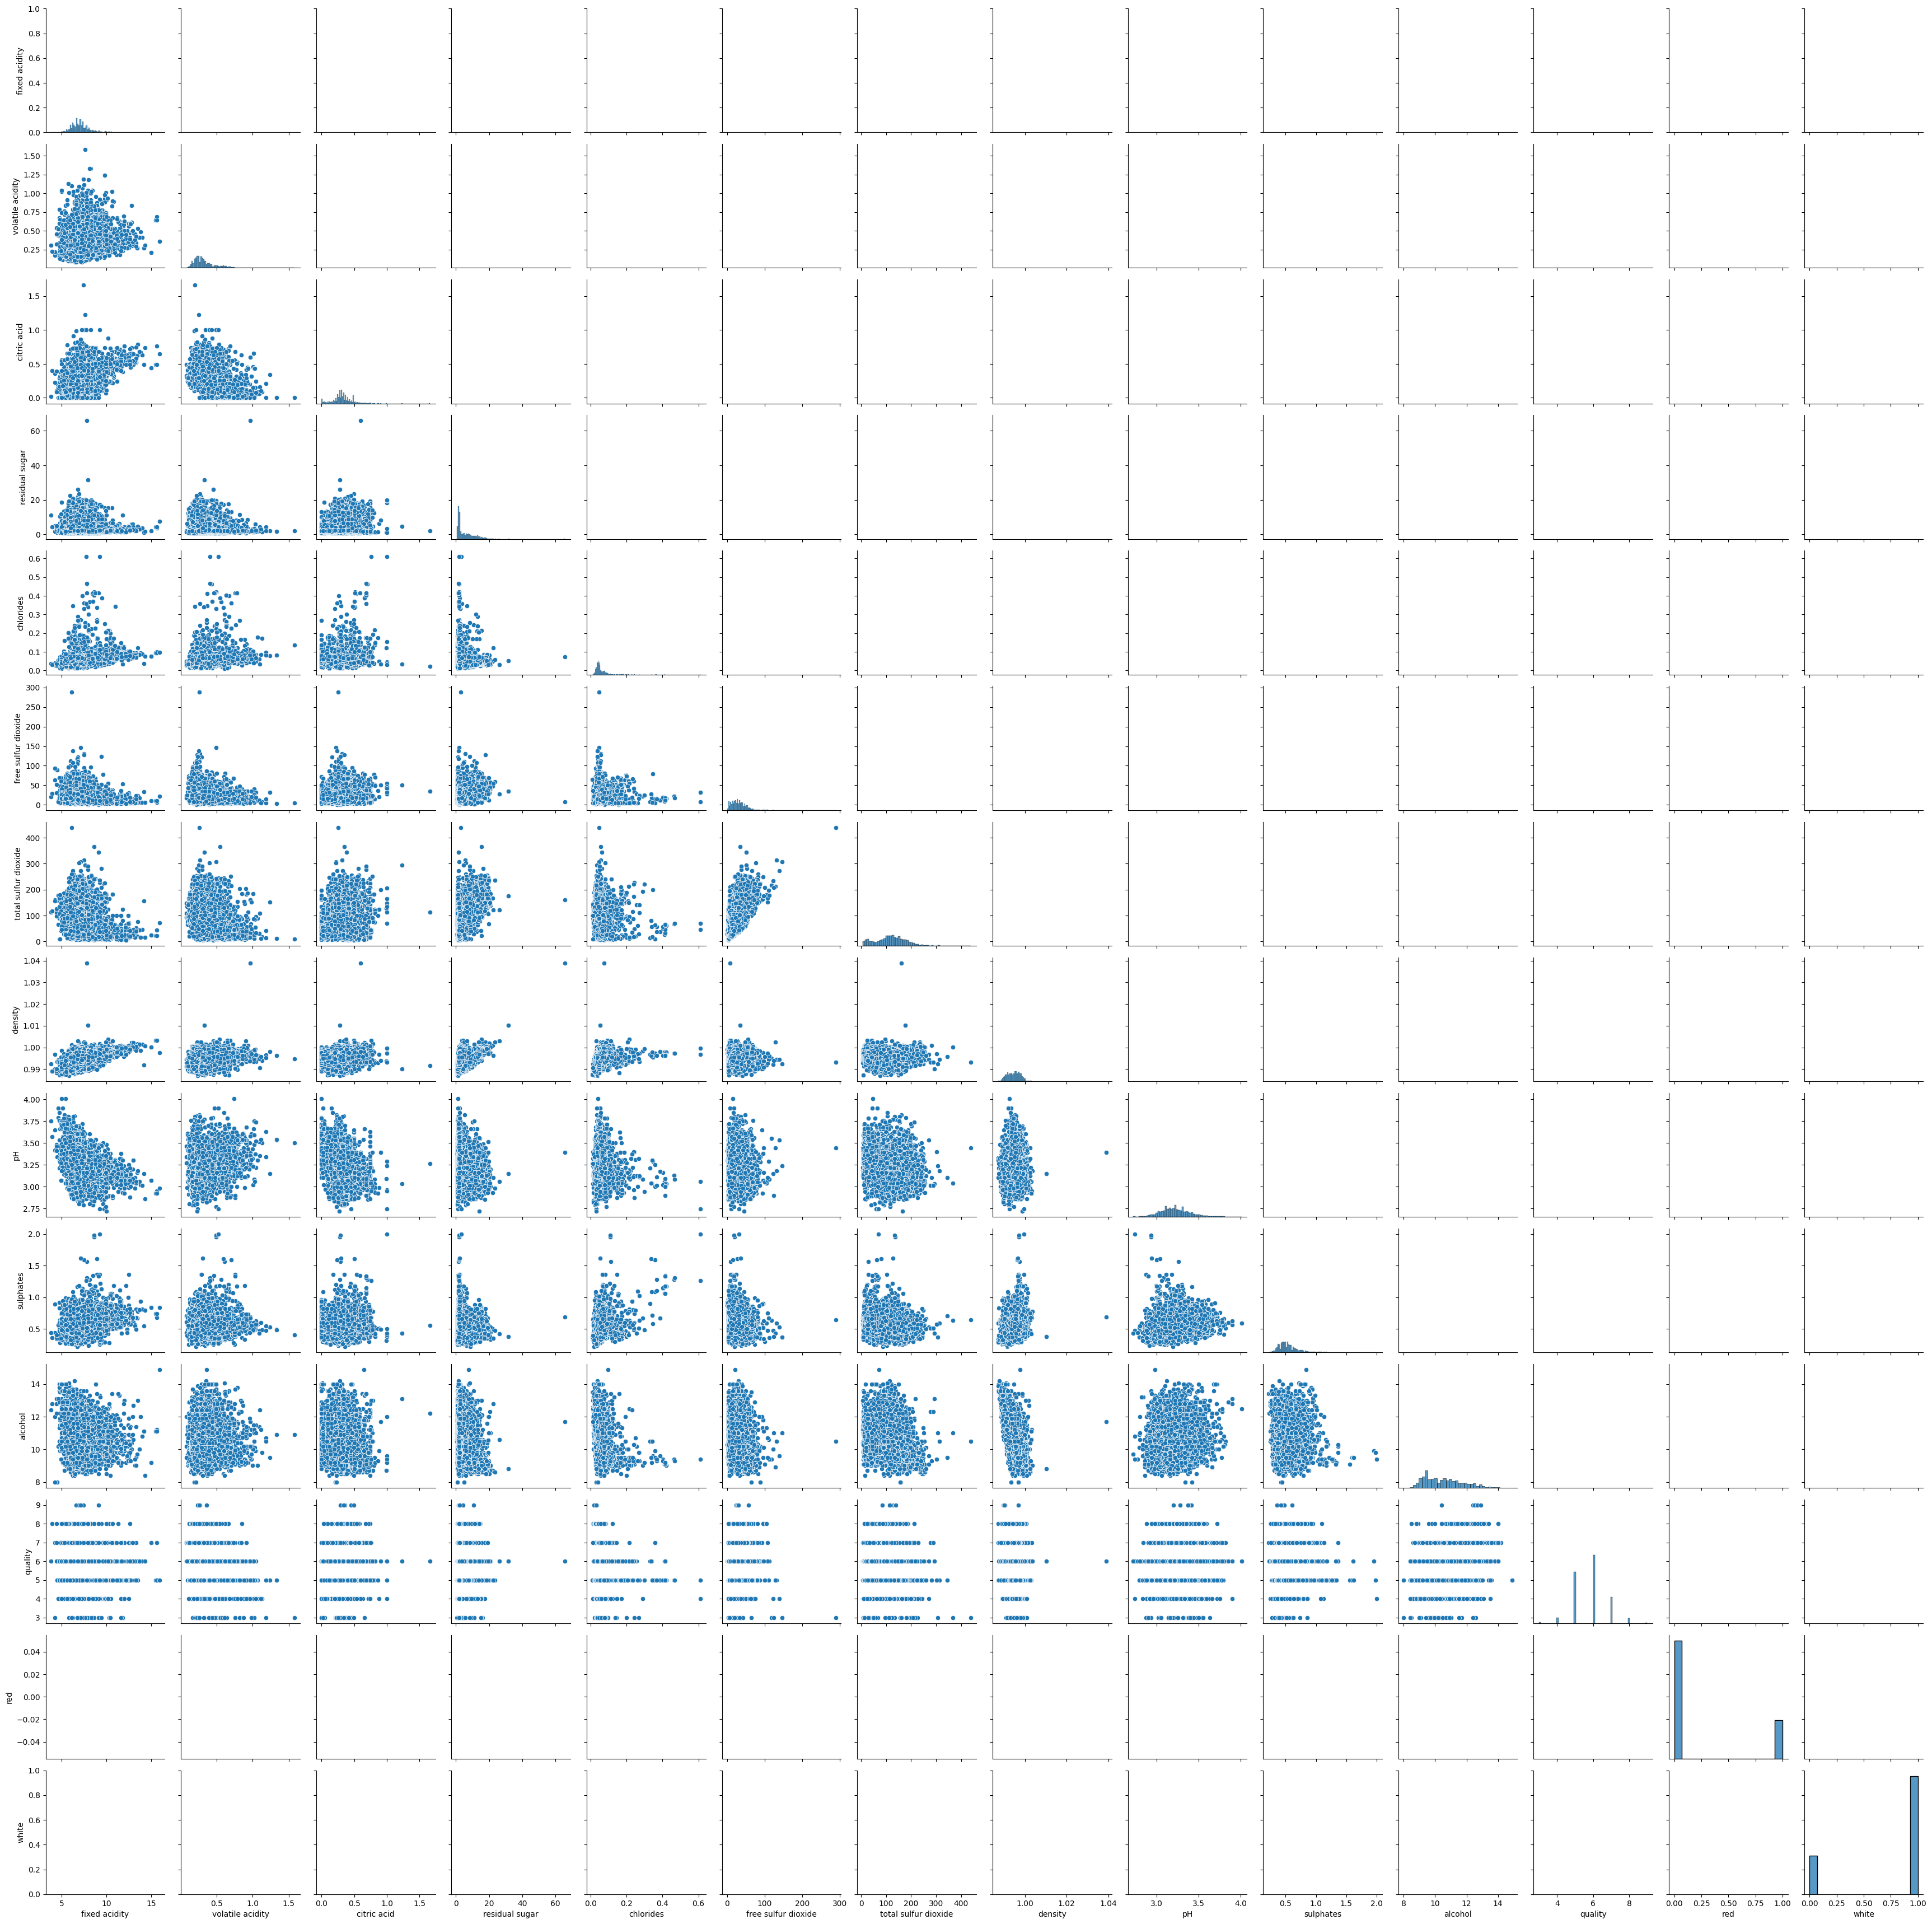

In [12]:
sns.pairplot(df)

In [ ]:
for column in df.columns:
    sns.histplot(df[column])
    plt.title(f"Distribución de {column}")
    plt.xlabel(column)
    plt.show()

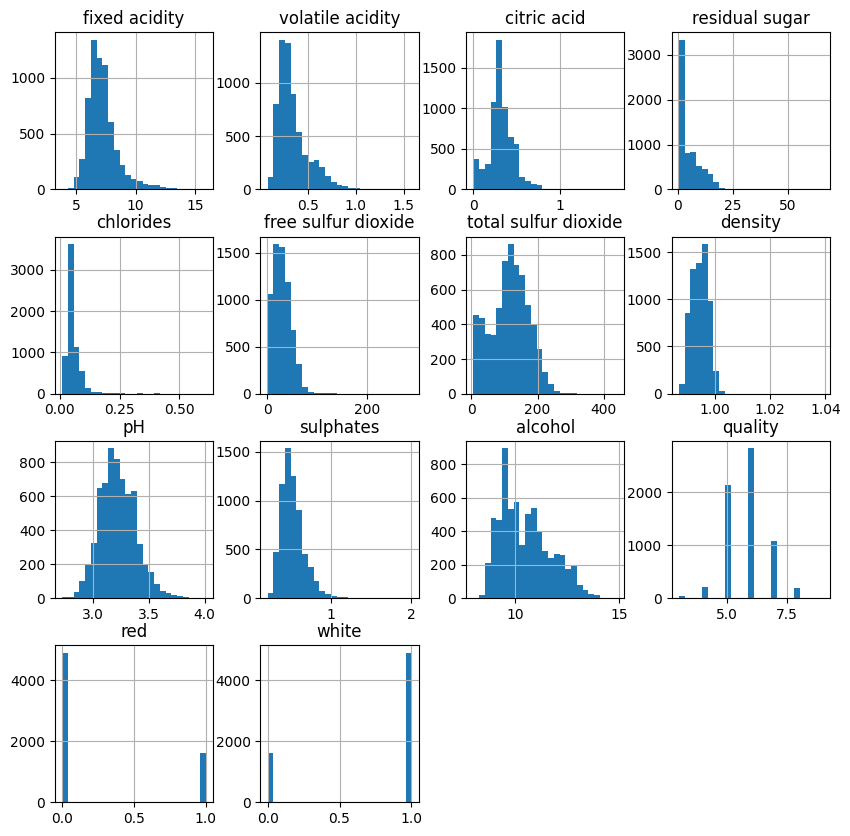

In [13]:
histogram = df.hist(bins=25, figsize=(10, 10))

# Muestra el histograma
plt.show()

# Ahora, para guardar la gráfica en un archivo de imagen en formato JPG:
histogram[0][0].get_figure().savefig('histograma.jpg', format='jpg')



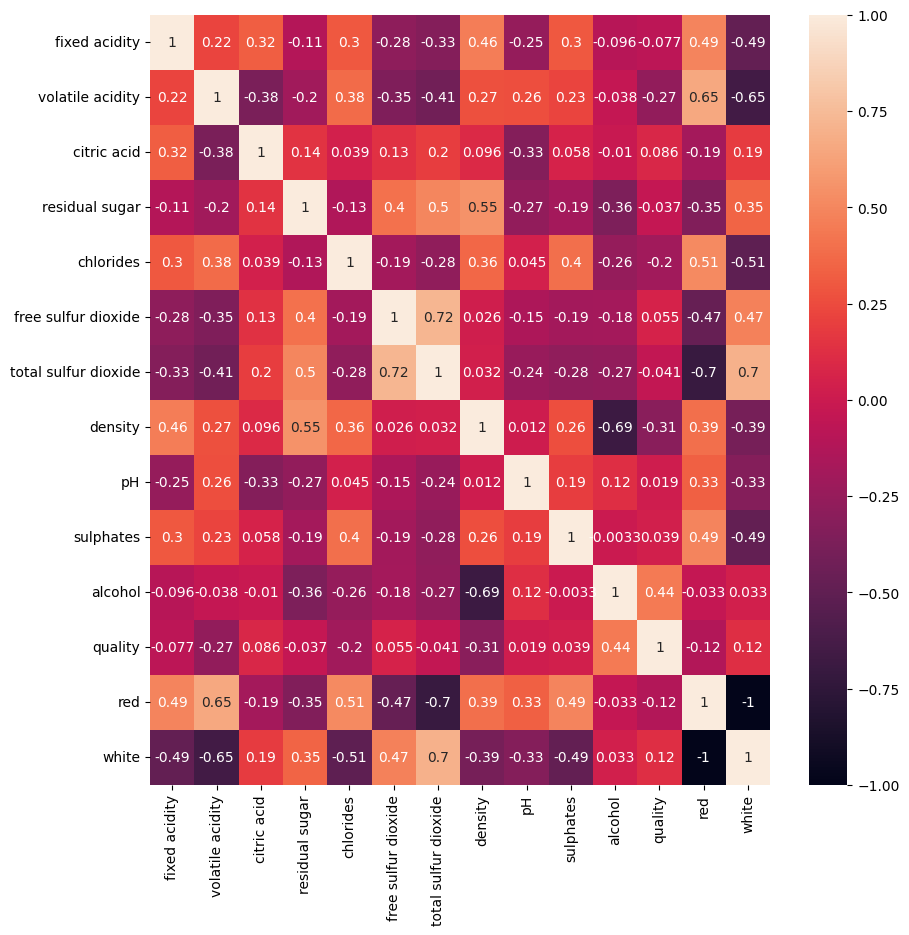

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [15]:
def data_report(df):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)


    return concatenado.T
        
data_report(df)

COL_N,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
DATA_TYPE,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,uint8,uint8
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,107,188,90,317,215,135,276,998,109,112,111,7,2,2
CARDIN (%),1.65,2.89,1.39,4.88,3.31,2.08,4.25,15.36,1.68,1.72,1.71,0.11,0.03,0.03


### División en train y test para entrenar modelo 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)